In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from lasso.dyna import Binout
from math import e
import sys
import os

## Read the results of the FE simulation in Result file

### An example for the first case

In [4]:
binout = Binout("Binout1_00_200/case0.binout0000")
binout.filelist
binout.read()
binout = Binout("Binout1_00_200/case0.binout*")
binout.filelist
nodesid = binout.read("nodout","ids")                     # ids of Nodes in database

print(nodesid.shape)
print(nodesid[132])
print(nodesid)
elementsid = binout.read("elout","shell","ids")[0]        # ids of Elements in database
print(elementsid.shape)
print(elementsid[120])
print(elementsid)
t=binout.read("nodout","time")                            # the Time Steps
print(t.shape)
print(t)

(272,)
298
[ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 363 364 365 366 367 368 369 370 371
 372 373 374 375 376 377 378 379 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417 418 441 442 443 444 445 446 447 448 449 450 451
 452 453 454 455 456 457 480 481 482 483 484 485 486 487 488 489 490 491
 492 493 494 495 496 519 520 521 522 523 524 525 526 527 528 529 530 531
 532 533 534 535 558 559 560 561 562 563

### Read the results of all cases

In [5]:
for i in range (100):                                 # Es ist besser, die Binout-Daten nicht alle zusammen zu nehmen (hier wurde zum Beispiel die erste 100 genommen,
                                                                                                # dann wird im nächsten Schritt die zweite 100 genommen USW....) 
    #b = locals()["binout"+str(i)]
    c = 'Binout1_00_200/case{}.binout*'.format(i)
    #nodids = 'nodids{}'.format(i)
    #print(nodids)
    locals()["binout"+str(i)] = Binout(c)
    locals()["binout"+str(i)].filelist
    locals()["binout"+str(i)].read()
    locals()["nodids"+str(i)] = locals()["binout"+str(i)].read("nodout","ids")
    locals()["nodx_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","x_displacement")
    locals()["nody_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","y_displacement")
    locals()["secforce_xforce"+str(i)] = locals()["binout"+str(i)].read("secforc","x_force")

In [6]:
for i in range (100,201):                  # hier wird die zweite 100 genommen (100- 201)
    #b = locals()["binout"+str(i)]
    c = 'Binout1_00_200/case{}.binout*'.format(i)
    #nodids = 'nodids{}'.format(i)
    #print(nodids)
    locals()["binout"+str(i)] = Binout(c)
    locals()["binout"+str(i)].filelist
    locals()["binout"+str(i)].read()
    locals()["nodids"+str(i)] = locals()["binout"+str(i)].read("nodout","ids")
    locals()["nodx_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","x_displacement")
    locals()["nody_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","y_displacement")
    locals()["secforce_xforce"+str(i)] = locals()["binout"+str(i)].read("secforc","x_force")

In [5]:
#for i in range (200,300):
    #b = locals()["binout"+str(i)]
    #c = 'results/Binout4100_3/Binout4100_3/case{}.binout*'.format(i)
    #nodids = 'nodids{}'.format(i)
    #print(nodids)
    #locals()["binout"+str(i)] = Binout(c)
    #locals()["binout"+str(i)].filelist
    #locals()["binout"+str(i)].read()
    #locals()["nodids"+str(i)] = locals()["binout"+str(i)].read("nodout","ids")
    #locals()["nodx_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","x_displacement")
    #locals()["nody_displacement"+str(i)] = locals()["binout"+str(i)].read("nodout","y_displacement")
    #locals()["secforce_xforce"+str(i)] = locals()["binout"+str(i)].read("secforc","x_force")

In [7]:
print(nodx_displacement1[:,132].shape)
#print(nodx_displacement1[:,132])
print(nody_displacement1.shape)
print(secforce_xforce1.shape)
#print(nodx_displacement1[:,:])

(101,)
(101, 272)
(101,)


### print the displecement and the force matrixes of one node

In [53]:
#for j in range (A.shape[0]):
    #print('nodx_displacement{} shape = '.format(j) , locals()["nodx_displacement"+str(j)].shape)
    #print('nodx_displacement{} = '.format(j) , locals()["nodx_displacement"+str(j)])
#for j in range (A.shape[0]):
    #print('secforce_xforce{} shape = '.format(j) , locals()["secforce_xforce"+str(j)].shape)
    #print('secforce_xforce{} = '.format(j) , locals()["secforce_xforce"+str(j)])

### Plotting of X-displacement and Force

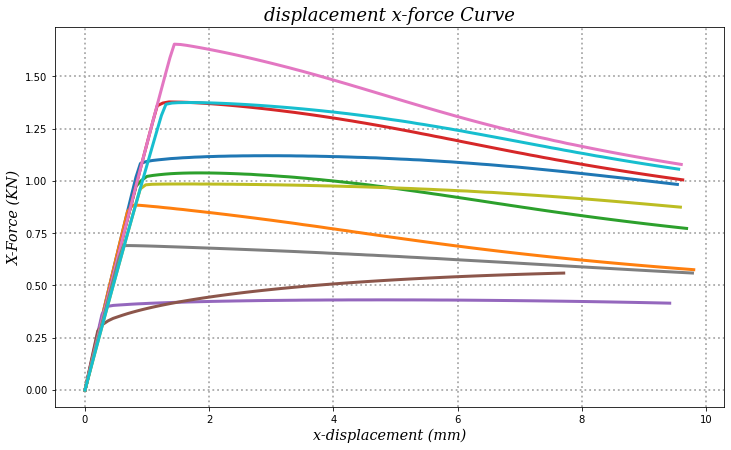

In [8]:
plt.figure(figsize=(12,7))                                  # In this example, all the plots will be in one figure. 
for j in range (10):
    x = locals()["nodx_displacement"+str(j)][:,132]
    y = locals()["secforce_xforce"+str(j)]
    plt.plot(x,y,linewidth=3)
plt.title('displacement x-force Curve',family='serif', style='italic' ,fontsize=18)
plt.xlabel('x-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
plt.ylabel('X-Force (KN)',family='serif', style='italic' ,fontsize='x-large')
plt.grid( ls=':', color='#AAAAAA', linewidth=1.8 )

### Plotting of Y-displacement and Force

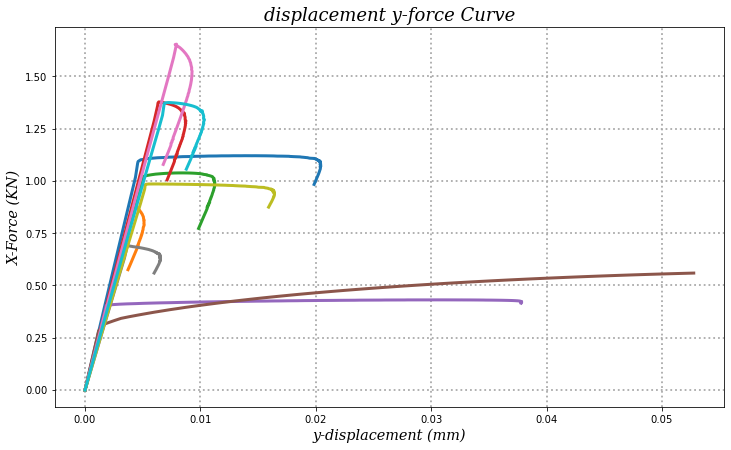

In [9]:
plt.figure(figsize=(12,7))                                  # In this example, all the plots will be in one figure. 
for j in range (10):
    x = locals()["nody_displacement"+str(j)][:,132]
    y = locals()["secforce_xforce"+str(j)]
    plt.plot(x,y,linewidth=3)
plt.title('displacement y-force Curve',family='serif', style='italic' ,fontsize=18)
plt.xlabel('y-displacement (mm)',family='serif', style='italic' ,fontsize='x-large')
plt.ylabel('X-Force (KN)',family='serif', style='italic' ,fontsize='x-large')
plt.grid( ls=':', color='#AAAAAA', linewidth=1.8 )

### write the Result in HDF5 file

In [11]:
filename = 'Training data 10100.h5'
h5file = h5py.File( filename, 'r+' )
for i in range (200):
    b = 'case{}'.format(i)
    h5file[b].create_dataset('x_displacement{}'.format(i), data = locals()["nodx_displacement"+str(i)][:,:])
    h5file[b].create_dataset('y_displacement{}'.format(i), data = locals()["nody_displacement"+str(i)][:,:])
    h5file[b].create_dataset('x_force{}'.format(i), data = locals()["secforce_xforce"+str(i)])
h5file.visit(print)
print( 'metadata cases:\n', dict( h5file[b].attrs) )
h5file.close()

case0
case0/Label0
case0/x_displacement0
case0/x_force0
case0/y_displacement0
case1
case1/Label1
case1/x_displacement1
case1/x_force1
case1/y_displacement1
case10
case10/Label10
case10/x_displacement10
case10/x_force10
case10/y_displacement10
case100
case100/Label100
case100/x_displacement100
case100/x_force100
case100/y_displacement100
case1000
case1000/Label1000
case10000
case10000/Label10000
case10001
case10001/Label10001
case10002
case10002/Label10002
case10003
case10003/Label10003
case10004
case10004/Label10004
case10005
case10005/Label10005
case10006
case10006/Label10006
case10007
case10007/Label10007
case10008
case10008/Label10008
case10009
case10009/Label10009
case1001
case1001/Label1001
case10010
case10010/Label10010
case10011
case10011/Label10011
case10012
case10012/Label10012
case10013
case10013/Label10013
case10014
case10014/Label10014
case10015
case10015/Label10015
case10016
case10016/Label10016
case10017
case10017/Label10017
case10018
case10018/Label10018
case10019
case10

In [12]:
#h5file.visit(print)
h5file.close()

In [13]:
print(nodx_displacement1[:,132].shape)
print(secforce_xforce1*272)

(101,)
[  0.          23.8584153   47.57506215  71.15119608  94.58800269
 117.88665489 141.04831301 164.07412499 186.9652265  209.72274111
 232.16516719 240.5367244  240.3216421  239.65533504 238.87984878
 238.18034858 237.26440005 236.51257058 235.5551785  234.77988493
 233.79032073 232.87379084 231.95396038 231.01154149 230.08190428
 229.08427956 228.12368055 227.09602492 226.1056238  225.06531738
 224.02771659 222.95706    221.89004258 220.83879162 219.71164017
 218.61137784 217.51900292 216.37895706 215.1287954  214.06596396
 212.93706317 211.75978175 210.49584951 209.41791925 208.1760358
 207.07738472 205.80040583 204.65802439 203.45934124 202.31097224
 201.12352877 199.98206999 198.80954339 197.67320885 196.51679801
 195.39248595 194.25575998 193.14486937 192.02894476 190.93756526
 189.84630883 188.79453979 187.69647317 186.69532359 185.63532417
 184.60397274 183.5927584  182.59486844 181.61036212 180.63932522
 179.68111214 178.73656846 177.80475296 176.88683833 175.98144916
 175